### MIBI-TOF dataset to study  the spatial organization of the tumor microenvironment and breast cancer progression

#### Conditions:
1. Normal (N=9)
2. Non-progressors (ctrl) (N=44)
3. Progressors (case) (N=14)


The MIBI-TOF breast cancer data from Risom et al. is available in a public Mendeley data repository: https://data.mendeley.com/datasets/d87vg86zd8. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import scanpy as sc
import graphcompass as gc

## Load data

In [4]:
DATA_PATH = "/data/mibitof_breast_cancer/"

In [5]:
adata = sc.read_h5ad(DATA_PATH + "adata_processed.h5ad")

In [6]:
adata.obs.head()

,event,Point_Num,CohortNumber,Tissue_Type,Status,Tissue,sublineage,phenotype,compartment,celllineage,...,Neighbor_dist_BCELL,Neighbor_dist_TCELL,Neighbor_dist_NEUT,Neighbor_dist_IMMUNEOTHER,K10_cluster,duct_edge_mask,duct_mid_mask,duct_core_mask,labels_id,batch
labels_id,,,,,,,,,,,,,,,,,,,,,
2,70001,2203,3,DCIS,ctrl,DCIS,TUMOR,TUMOR_LUMINAL,epithelial,tumor,...,0.0,0.0,0.0,0.0,8,0,0,0,2,0
4,70003,2203,3,DCIS,ctrl,DCIS,TUMOR,TUMOR_LUMINAL,epithelial,tumor,...,0.0,0.0,0.0,0.0,2,1,0,0,4,0
10,70006,2203,3,DCIS,ctrl,DCIS,TUMOR,TUMOR_LUMINAL,epithelial,tumor,...,0.0,0.0,0.0,0.0,2,0,1,0,10,0
11,70007,2203,3,DCIS,ctrl,DCIS,TUMOR,TUMOR_LUMINAL,epithelial,tumor,...,0.0,0.0,0.0,0.0,2,0,1,0,11,0
13,70008,2203,3,DCIS,ctrl,DCIS,TUMOR,TUMOR_LUMINAL,epithelial,tumor,...,0.0,0.0,0.0,0.0,8,1,0,0,13,0


## Compute distances between cell-type specific subgraphs using portrait method to compare conditions

In [7]:
# define library_key and cluster_key for computing spatial graphs using `squidpy.gr.spatial_neighbors`

library_key="Point_Num"
cluster_key="phenotype"

In [8]:
# compute pairwise similarities between cell-type specific graphs across samples
### results are stored in adata.uns["pairwise_similarities"]

gc.tl.distance.compare_conditions(
    adata=adata,
    library_key=library_key,
    cluster_key=cluster_key,
    method="portrait",
    kwargs_spatial_neighbors={
        'coord_type': 'generic',
        'delaunay': True,  
    }  
)

In [9]:
adata

AnnData object with n_obs × n_vars = 57880 × 59
    obs: 'event', 'Point_Num', 'CohortNumber', 'Tissue_Type', 'Status', 'Tissue', 'sublineage', 'phenotype', 'compartment', 'celllineage', 'sublineage_code', 'phenotype_code', 'compartment_code', 'celllineage_code', 'manual_gating_cellineage', 'manual_gating_subineage', 'manual_gating_phenotype', 'innerduct_mask', 'distal_mask', 'stroma_mask', 'periph_mask', 'epi_mask', 'duct_mask', 'myoep_mask', 'ERstatus', 'HER2status', 'ARstatus', 'Ki67status', 'pS6status', 'GLUT1status', 'HIF1astatus', 'COX2status', 'CD36status', 'CD44status', 'PD1status', 'PDL1status', 'IDO1status', 'GZMBstatus', 'ECADstatus', 'MMP9status', 'VIMstatus', 'FAPstatus', 'HLADRstatus', 'CD3status', 'SMAstatus', 'COLIstatus', 'CK5status', 'CK7status', 'P63status', 'myoep_dist_label', 'myoep_dist_MinDist', 'myoep_dist_MaxDist', 'myoep_dist_MedDist', 'myoep_dist_MeanDist', 'celltype_code', 'myoep_dist_MinDist1', 'Neighbor_dist_TUMOR', 'Neighbor_dist_MYOEP', 'Neighbor_dist_FI

## Plot results

In [10]:
# define necessary params
condition_key="Status" # key in adata.obs where conditions are stored
control_group="normal" # reference group

23it [00:40,  1.77s/it]


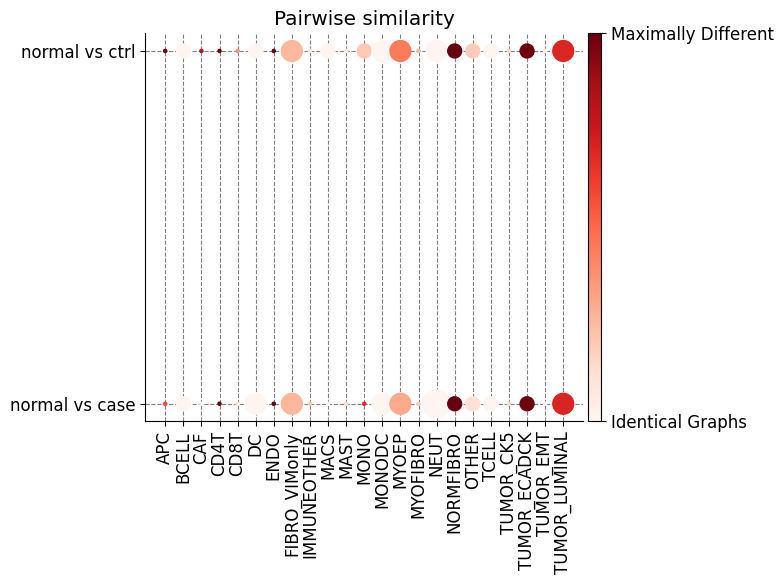

In [13]:
## Note: dot size indicates the variance between samples. The smaller the dot the more variance there is 
## between samples.

gc.pl.distance.compare_conditions(
    adata=adata,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    # add_ncells_and_density_plots=True,
    palette="Reds",
    dpi=100,
    figsize=(8,6),
#     save="figures/mibitof_portrait.pdf"
)